# Age Detection Project

**Introduction**

The goal of this project is to develop a machine learning model that can accurately predict a person's age from their facial image. Age prediction has numerous applications in various fields, such as security, marketing, and human-computer interaction. However, building an accurate age prediction model can be challenging due to the complex nature of facial features and the impact of various factors like ethnicity, gender, and environmental conditions on facial appearance.

**Methodology**

To tackle this problem, we employ deep learning techniques, specifically Convolutional Neural Networks (CNNs), which have proven to be effective in computer vision tasks. The methodology can be divided into the following steps:

1. **Data Acquisition**: The first step involves obtaining a dataset of facial images labeled with the corresponding ages. In this project, we use a dataset provided by an external source, which includes a training set and a test set.
2. **Data Preprocessing**: The raw image data needs to be preprocessed before being fed into the neural network. This involves converting the images to a consistent size and format, as well as applying necessary transformations like normalization.
3. **Model Architecture**: We define a CNN architecture tailored for the age prediction task. The architecture consists of convolutional layers for feature extraction, followed by fully connected layers for age prediction.
4. **Model Training**: The model is trained on the preprocessed training data using an optimization algorithm (e.g., Adam optimizer) and a suitable loss function (e.g., Mean Squared Error). During training, the model learns to map the facial features to the corresponding age labels.
5. **Model Evaluation**: After training, the model's performance is evaluated on the test set, which was held out during the training process. Evaluation metrics, such as Mean Absolute Percentage Error (MAPE), are calculated to assess the model's accuracy.
5. **Model Deployment**: Once the model achieves satisfactory performance, it can be deployed for age prediction on new, unseen facial images.

**Conclusion**

This project demonstrates the application of deep learning techniques, specifically CNNs, for the age prediction task. By leveraging a labeled dataset of facial images and implementing a suitable CNN architecture, we were able to train a model that can predict a person's age with reasonable accuracy.

However, it's important to note that age prediction is a complex problem, and the model's performance may be influenced by various factors, such as the diversity of the training data, the quality of the images, and the presence of biases in the dataset. Additionally, ethical considerations regarding privacy and fairness should be taken into account when deploying such models in real-world applications.

Overall, this project provides a solid foundation for further research and improvements in age prediction models, as well as potential applications in related domains, such as facial recognition, demographic analysis, and personalized services.

## Environment Setup
Before running the code from the sections below, 
> create and activate a conda or python environment named ageDetector. 

Then, run this cell block

In [ ]:
!conda install wget 

In [ ]:
# OR
!pip install wget

Furthermore, install the dependencies in the requirements.txt file

## Data Download and Extraction

This Python script downloads the training and test data for the age detection project. It creates a <code>data</code> directory if it doesn't exist, downloads the ZIP files containing the images and associated data, extracts the files from the ZIP archives, and finally removes the ZIP files after extraction.

In [ ]:
# 00_data_download.py
# Run this cell block to download dataset (Do not edit)

# Importing required libraries
import os
import wget
import zipfile

# Create a directory if it doesn't exist
data_dir = 'data'
if not os.path.exists(data_dir):
   print("creating directory")
   os.makedirs(data_dir)

# URL of the file to be downloaded
train_url = 'https://hr-projects-assets-prod.s3.amazonaws.com/9n6t075aj3i/a6c7b1b1d2347e59d215792fdc1a70d0/train_images.zip'
test_url = 'https://hr-projects-assets-prod.s3.amazonaws.com/9n6t075aj3i/a7172d46cd0baf561bd47c89b49f4e0f/test_images.zip'

# Directory where to save the file
output_dir = '../data'

# Download the file
wget.download(train_url, out=output_dir)
print("\ntraining data downloaded")
wget.download(test_url, out=output_dir)
print("\ntest data downloaded")

# Unzip the file
with zipfile.ZipFile(os.path.join(output_dir, 'train_images.zip'), 'r') as zip_ref:
   zip_ref.extractall(output_dir)
   # Check that the files were successfully unzipped
   for file in zip_ref.namelist():
       print(file)

with zipfile.ZipFile(os.path.join(output_dir, 'test_images.zip'), 'r') as zip_ref:
   zip_ref.extractall(output_dir)
   # Check that the files were successfully unzipped
   for file in zip_ref.namelist():
       print(file)

# Remove zip files
os.remove(os.path.join(output_dir, 'train_images.zip'))
os.remove(os.path.join(output_dir, 'test_images.zip'))

## Data Description
In this section, we perform exploratory data analysis (EDA) on the training and test datasets for the age detection project. It loads the CSV files containing the data, checks the quality of the data, describes the shape and summary statistics of the datasets, checks for missing values, and visualizes the distribution of ages using a histogram and a box plot.

In [13]:
# 01_data_description.py

# Importing required files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [14]:
# Setting global variable for the ipynb file
data_dir = '../data'

# Loading the training and testing dataset
train_df = pd.read_csv(os.path.join(data_dir, 'train.csv'))
test_df = pd.read_csv(os.path.join(data_dir, 'test.csv'))

In [15]:
# Check data quality
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  3000 non-null   object
 1   age        3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB
None


In [16]:
# Describe the shape, head, and summary of the training dataset
print(train_df.shape)
print(train_df.head())
print(train_df.describe())

(3000, 2)
            file_name  age
0  train_images/0.jpg   41
1  train_images/1.jpg   33
2  train_images/2.jpg   43
3  train_images/3.jpg   24
4  train_images/4.jpg   21
               age
count  3000.000000
mean     34.510000
std       8.884455
min      20.000000
25%      27.000000
50%      34.000000
75%      42.000000
max      50.000000


In [17]:
# Describe the shape, head, and summary of the testing dataset
print(test_df.shape)
print(test_df.head())
print(test_df.describe())

(1000, 1)
           file_name
0  test_images/0.jpg
1  test_images/1.jpg
2  test_images/2.jpg
3  test_images/3.jpg
4  test_images/4.jpg
                file_name
count                1000
unique               1000
top     test_images/0.jpg
freq                    1


In [18]:
# Check for missing values
print("\nData quality check:")
print(train_df.isnull().sum())
print(test_df.isnull().sum())


Data quality check:
file_name    0
age          0
dtype: int64
file_name    0
dtype: int64


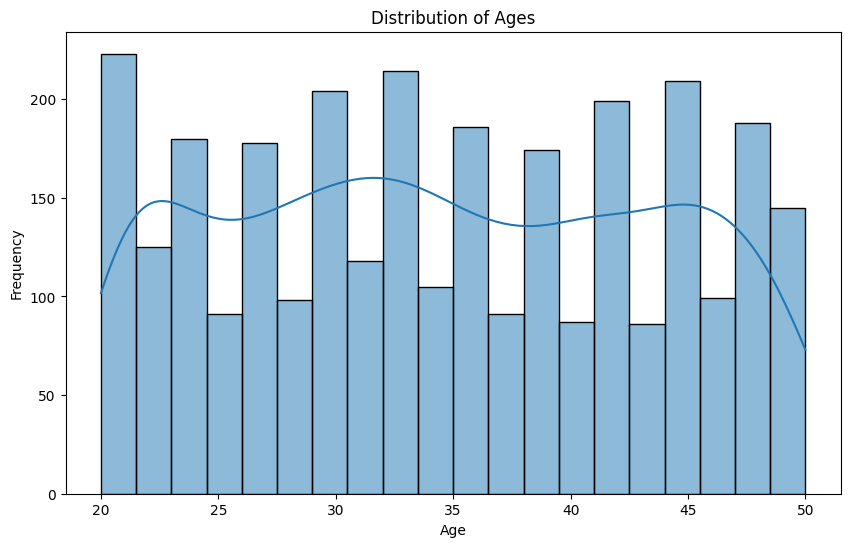

In [19]:
# Data distribution visualization
plt.figure(figsize=(10, 6))
sns.histplot(train_df['age'], bins=20, kde=True)
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

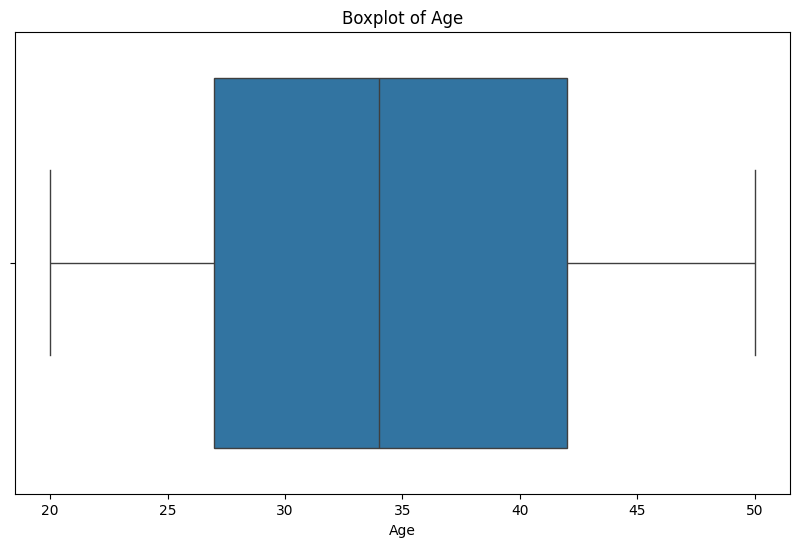

In [20]:
# Box plot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_df['age'])
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

## Data Preprocessing Pipeline for our Pytorch machine learning models

This Python script defines a custom dataset class <code>CustomDataset</code> that inherits from <code>torch.utils.data.Dataset</code>. The class is used to load and preprocess the images and their corresponding age labels from the dataset. It also defines a transformation pipeline <code>transform</code> that resizes the images to 128x128 pixels and converts them to PyTorch tensors.

In [21]:
# data_preprocessing.py

# Importing required libraries
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms

# Define a custom dataset class for loading images and labels
class CustomDataset(Dataset):
    def __init__(self, dataframe, image_dir, transform=None):
        self.dataframe = dataframe
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = os.path.join(self.image_dir, self.dataframe.iloc[idx, 0])
        image = Image.open(img_name)
        age = self.dataframe.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        return image, age

# Transformation pipeline
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

## Model Training

This Python script is responsible for developing and training a convolutional neural network (CNN) model for age prediction using the provided dataset. 

It performs the following steps:

1. Imports the required libraries and the custom dataset class from <code>data_preprocessing.py</code>.
2. Loads the training data from a CSV file and splits it into training and validation sets using <code>train_test_split</code> from <code>scikit-learn</code>.
3. Creates an instance of the <code>CustomDataset</code> for the training set.
4. Defines the architecture of the CNN model using PyTorch's <code>nn.Module</code>.
5. Sets up the loss function (<code>nn.MSELoss</code>) and optimizer (<code>optim.Adam</code>).
6. Trains the model for a specified number of epochs, calculating and printing the loss for each epoch.
7. Evaluates the model's performance on the training set by calculating the Mean Absolute Percentage Error (MAPE).
8. Saves the trained model to a file (<code>models/age_prediction_model.pth</code>).

In [23]:
# 03_model_training.py

# Importing required libraries of pytorch (for model building) and sklearn (for evaluation metrics and split)
from sklearn.model_selection import train_test_split
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from sklearn.metrics import mean_absolute_percentage_error
from data_preprocessing import CustomDataset, transform

# Load the dataset
data_df = pd.read_csv("../data/train.csv")

# Split the dataset into training and validation sets
train_df, val_df = train_test_split(data_df, test_size=0.2, random_state=42)

# Create the dataset
train_dataset = CustomDataset(train_df, "../data", transform=transform)

### Model Architecture 1

In [37]:
# Define the model architecture
class AgePredictionModel(nn.Module):
    def __init__(self):
        super(AgePredictionModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.fc1 = nn.Linear(64 * 30 * 30, 128)
        self.fc2 = nn.Linear(128, 1)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
# Create the model
model = AgePredictionModel()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Set the hyperparameters
num_epochs = 50
batch_size = 10

### Model Architecture 2

In this improved version:

1. We've added more convolutional layers (conv3 and conv4) to capture deeper and more abstract features from the input images.
2. Each convolutional layer is followed by a ReLU activation function and a max-pooling layer to downsample the feature maps.
3. The output of the convolutional layers is flattened before passing it through fully connected layers (fc1 and fc2).
4. The final output is a single neuron, representing the predicted age.

In [33]:
import torch.nn.functional as F

class AgePredictionModel(nn.Module):
    def __init__(self):
        super(AgePredictionModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(256 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 1)

    def forward(self, x):
        # Convolutional layers
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = self.pool(x)
        x = F.relu(self.conv4(x))
        x = self.pool(x)

        # Flatten the output
        x = torch.flatten(x, 1)

        # Fully connected layers
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Create the model
model = AgePredictionModel()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.00001)

# Set the hyperparameters
num_epochs = 50
batch_size = 10


### Training of either of the above models

In [38]:
# Build the data loader
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Train the model
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.float().view(-1, 1))
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader)}")

# Evaluate the model
total_absolute_percentage_error = 0
total_samples = 0

with torch.no_grad():
    for data in train_loader:
        inputs, labels = data
        outputs = model(inputs)

        absolute_percentage_error = np.abs((outputs.cpu().numpy() - labels.numpy()) / labels.numpy())
        total_absolute_percentage_error += np.sum(absolute_percentage_error)
        total_samples += len(labels)

# Calculate Mean Absolute Percentage Error (MAPE)
mape_train = (total_absolute_percentage_error / total_samples) * 100
print("Mean Absolute Percent Error (MAPE) on the training set:", mape_train)


# Save the trained model
torch.save(model.state_dict(), '../models/age_prediction_model.pth')

Epoch 1, Loss: 107.7608072678248
Epoch 2, Loss: 86.94274982611338
Epoch 3, Loss: 83.11839681466421
Epoch 4, Loss: 79.46506555875142
Epoch 5, Loss: 77.19890977541606
Epoch 6, Loss: 70.54164287646611
Epoch 7, Loss: 68.23255740006765
Epoch 8, Loss: 60.53824810584386
Epoch 9, Loss: 52.68753788868586
Epoch 10, Loss: 44.24385264317195
Epoch 11, Loss: 36.51667623321215
Epoch 12, Loss: 26.36918475627899
Epoch 13, Loss: 20.042465512951214
Epoch 14, Loss: 13.296695242822171
Epoch 15, Loss: 9.694743406275908
Epoch 16, Loss: 6.914870007336139
Epoch 17, Loss: 4.982764966785908
Epoch 18, Loss: 4.623744288335244
Epoch 19, Loss: 4.9615338998536265
Epoch 20, Loss: 4.643810053914786
Epoch 21, Loss: 3.3497010649492345
Epoch 22, Loss: 2.661953154640893
Epoch 23, Loss: 2.9319204576313496
Epoch 24, Loss: 4.114563107614716
Epoch 25, Loss: 4.539647886653741
Epoch 26, Loss: 4.715979486703873
Epoch 27, Loss: 3.69912085061272
Epoch 28, Loss: 3.052947641412417
Epoch 29, Loss: 2.5471751199414334
Epoch 30, Loss: 2.

## Model Evaluation

This Python script is responsible for evaluating the convolutional neural network (CNN) model that we developed in our model training step. 

It performs the following steps:

1. Loads the saved model.
2. Creates an instance of the <code>CustomDataset</code> for the validation set.
3. Creates a data loader for the validation set.
5. Evaluates the model on the validation set, printing the predicted and actual ages for each sample.

In [39]:
# Load the trained model
model = AgePredictionModel()
model.load_state_dict(torch.load('../models/age_prediction_model.pth'))

# Create the test dataset
test_dataset = CustomDataset(val_df, "../data", transform=transform)

# Create the test data loader
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

# Evaluate the model on the validation set
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        outputs = model(inputs)

        # Convert output to numpy
        outputs = outputs.cpu().numpy()
        labels = labels.numpy()

        # Iterate over each prediction and label
        for output, label in zip(outputs, labels):
            # Print each prediction and label individually
            print("Predicted age: {:.2f}, Actual age: {:.2f}".format(output[0], label))

Predicted age: 27.08, Actual age: 49.00
Predicted age: 40.91, Actual age: 43.00
Predicted age: 38.62, Actual age: 34.00
Predicted age: 38.44, Actual age: 50.00
Predicted age: 40.02, Actual age: 43.00
Predicted age: 41.01, Actual age: 33.00
Predicted age: 30.34, Actual age: 38.00
Predicted age: 30.61, Actual age: 32.00
Predicted age: 30.23, Actual age: 21.00
Predicted age: 25.54, Actual age: 31.00
Predicted age: 30.18, Actual age: 20.00
Predicted age: 33.27, Actual age: 33.00
Predicted age: 36.94, Actual age: 29.00
Predicted age: 39.21, Actual age: 50.00
Predicted age: 47.42, Actual age: 31.00
Predicted age: 32.59, Actual age: 41.00
Predicted age: 38.48, Actual age: 44.00
Predicted age: 31.28, Actual age: 33.00
Predicted age: 26.93, Actual age: 46.00
Predicted age: 33.29, Actual age: 32.00
Predicted age: 32.36, Actual age: 27.00
Predicted age: 30.37, Actual age: 43.00
Predicted age: 35.08, Actual age: 35.00
Predicted age: 31.12, Actual age: 27.00
Predicted age: 40.14, Actual age: 46.00
